## Loading data with pandas

In [5]:
# pandas is a really powerfull python library to load and handle data
import pandas as pd

# read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the dataset shape
print ("Shape: ", data.shape)

# display the first 5 rows
data.head()

Shape:  (200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data

In [6]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

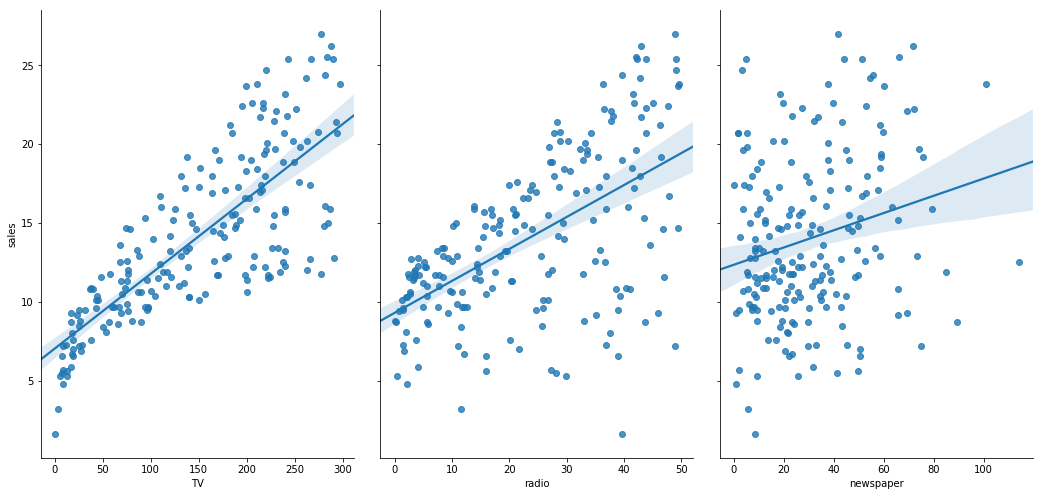

In [8]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### preparing data with pandas

In [9]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'radio', 'newspaper']]

# print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [10]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [13]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
y = data.sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [14]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


### splitting data and fitting a simple LinearRegression module

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [18]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150281),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804412)]

### predicting results

In [19]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

### the popular metric to evaluate regression models is Root Mean Squared Error (RMSE)

In [24]:
from sklearn import metrics
import numpy as np

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


## Feature Selection

Does newspaper have a place in our model? The coefficient is so low that it's worth to try removing the feature from the data

In [26]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.